In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from lib.util.data import read_result_data
from lib.util.env import getbase_dir

ModuleNotFoundError: No module named 'lib.util'

In [2]:
def plt_exec_time_general(df,measure_variable,title,fig_dim=(11.7, 8.27)):


    measure_variable = measure_variable+"_exec_time_bc"
    sns.set(style="whitegrid")
    f, axes = plt.subplots(1, 2,figsize=fig_dim)

    sns.violinplot(data=df, y=measure_variable,color="gray",
                    inner=None, linewidth=0, saturation=0.8 ,
                    ax=axes[0])

    axes[0].boxplot(df[measure_variable], whis='range', positions=np.array([0]),
                showcaps=False,widths=0.06, patch_artist=True,
                boxprops=dict(color="indigo", facecolor="c"),
                whiskerprops=dict(color="gray", linewidth=1),
                medianprops=dict(color="w", linewidth=2 ))

    sns.boxplot(y=measure_variable, data=df, showfliers=False,
                color="white", ax=axes[1])
    f.suptitle(title)
    axes[0].set(xlabel=' ', ylabel='Execution time in sec')
    axes[1].set(xlabel=' ', ylabel='Execution time in sec')
    # plt.show()
    return f

def plot_all_exec_time(results,fig_dim=(11.7, 8.27)):
    df = arrange_all_exec_time(results)
    f, ax = plt.subplots(figsize=fig_dim)
    ax.set(yscale="log")
    sns.barplot(data=df,x='setup',y='execution_time',ax=ax)

    # plot bar values
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

    ax.set_yticks([0.1, min(df['execution_time']), max(df['execution_time']), max(df['execution_time']) * 10])
    # x
    ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
    ax.set(xlabel=' ', ylabel='Execution time in sec (log)')
    f.suptitle('Total Execution Time', fontsize=12)

    return f

def arrange_bc_exec_time(results, labels):
    assert len(results) == len(labels)
    data = {}
    for i in range(0,len(results)):
        name = labels[i] + '_exec_time_bc'
        data[name] = list(results[i]['exec_time_bc'])

    results[0]['exec_time_regular'] = max(results[0]['exec_time_regular'])

    data['regular_exec_time'] = results[0]['exec_time_regular']
    return pd.DataFrame(data)

def arrange_all_exec_time(results):
    d = {}
    i = 0
    for label in list(results.columns):

        if i == 0:
            d['setup'] = [label]
            d['execution_time'] = [results[label].sum()]
            i = 1
        else:
            tmp = d['setup']
            tmp.append(label)
            d['setup'] = tmp
            v = d['execution_time']
            v.append(results[label].sum())
            d['execution_time'] = v

    return pd.DataFrame(d)

In [2]:
bdir = getbase_dir(['results', 'e1'])
r_pow = read_result_data(bdir+'bike-PoW-09-03-2019_10-53-31-to-09-15-41-07.csv')
r_poa = read_result_data(bdir+'bike-PoA-09-03-2019_16-57-35-to-09-21-28-20.csv')
r_pr = read_result_data(bdir+'bike-private-PoW-11-03-2019_17-17-16-to-11-20-23-25.csv')
r = arrange_bc_exec_time([r_pr,r_pow, r_poa], ['Private-PoW','Ropsten-PoW', 'Rinkeby-PoA'])

NameError: name 'arrange_bc_exec_time' is not defined

In [4]:
r_pr['blockchain']  = 'Private-PoW'
r_pow['blockchain'] = 'Ropsten-PoW' 
r_poa['blockchain'] = 'Rinkeby-PoA'

In [5]:
df = pd.concat([pd.concat([r_pr,r_pow]),r_poa])
# pd.concat(r_pr[['exec_time_bc','blockchain']],r_poa[['exec_time_bc','blockchain']])

Text(-0.07,0.035,'0.03')

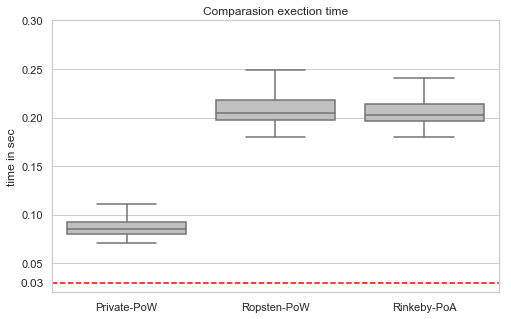

In [65]:
bdir = getbase_dir(['results', 'abel_01'])

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(y='exec_time_bc', x='blockchain', data=df, 
            color='silver' , saturation=.5,
            showfliers=False, ax=ax)
ax.axhline(.03, color='red', linestyle='--', linewidth=1.5, label='full_bf')
ax.set(ylabel='time in sec')
# ax.set_yscale("log")
ax.set_title("Comparasion exection time")
ax.set_xlabel("")
ax.set_ylim(0.02,.3)
from matplotlib.ticker import ScalarFormatter , MultipleLocator

ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.text(-.07, 0.035, '0.03', horizontalalignment='left',verticalalignment='center', transform=ax.transAxes)
# fig.savefig(bdir+'abel_cc_bc_exec_time.png',dpi=800)

##### bdir = getbase_dir(['results', 'abe_01'])


#fpr = plt_exec_time_general(r, 'Private-PoW', "Individual Private-PoW Execution Time")
#fpow = plt_exec_time_general(r,'Ropsten-PoW',"Individual Ropsten-PoW Execution Time")
#fpoa = plt_exec_time_general(r, 'Rinkeby-PoA', "Individual Rinkeby-PoA Execution Time")

fall = plot_all_exec_time(r)
#     fpr.savefig('..//results/e1/pri_bike.png', bbox_inches='tight')
#     fpow.savefig('..//results/e1/pow_bike.png', bbox_inches = 'tight')
#     fpoa.savefig('..//results/e1/poa_bike.png', bbox_inches = 'tight')
#fall.savefig(bdir+'all_bike.png', bbox_inches = 'tight')
